
___
# Linear Regression - Ecommerce Project
___
** This project uses a hypothetical ecommerce dataset.** 

The story is: 

There's an ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. 

Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their **mobile app experience** or their **website**. They've hired you on contract to help them figure it out! Let's get started!

## Imports

In [47]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Get the Data

The dataset has customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv('Ecommerce_Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**
___
** Using seaborn and jointplot we can compare the Time on Website and Yearly Amount Spent columns to see if there is a correlation.**

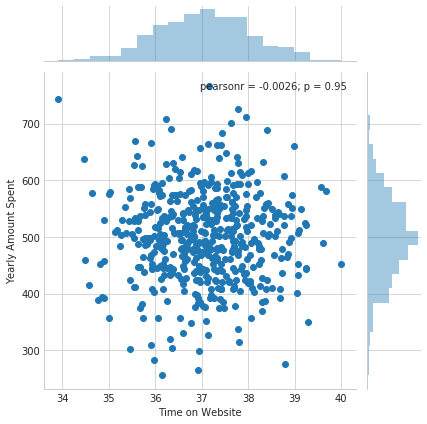

In [13]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = customers);

** Same but with the Time on App column instead. **

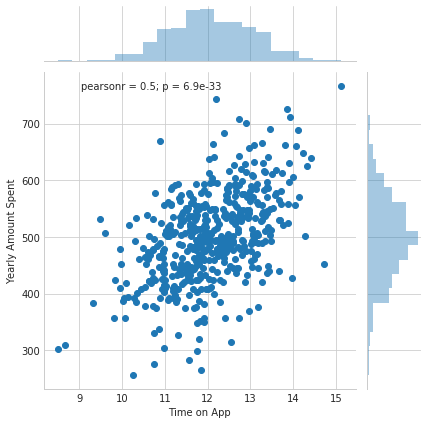

In [14]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data = customers);

** Seaborn and jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

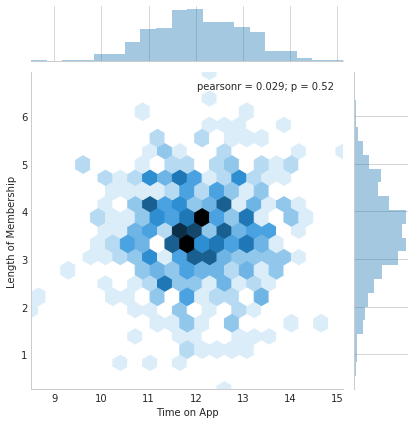

In [69]:
sns.jointplot(x='Time on App', y='Length of Membership', data = customers, kind ='hex');

**Exploring types of relationships across the entire data set with [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot).**

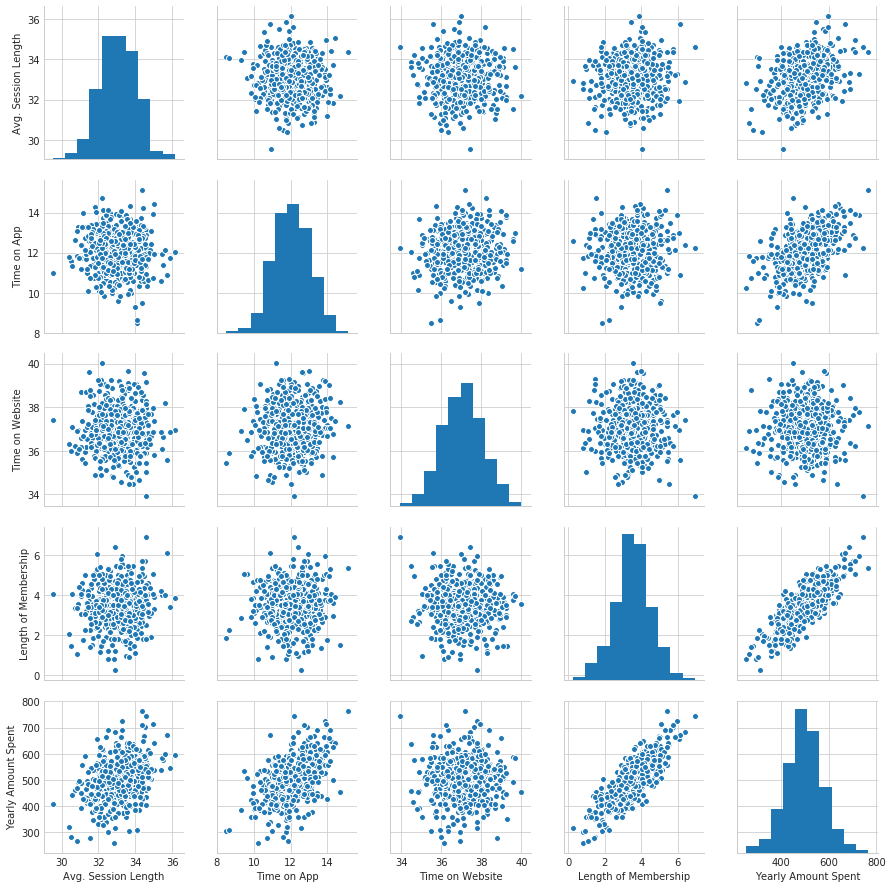

In [60]:
sns.pairplot(customers);

**Based off this plot Length of Membership appears to have the highest correlation to Yearly Amount Spent**
___


** Using seaborn's lmplot we can create linear plot of Yearly Amount Spent vs. Length of Membership. **

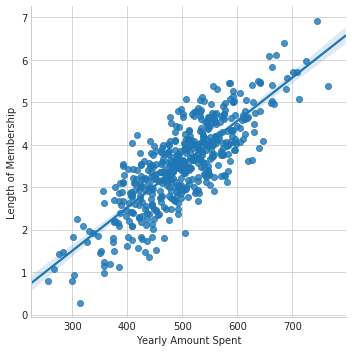

In [19]:
sns.lmplot(x='Yearly Amount Spent', y = 'Length of Membership', data = customers);

Already we can see the data has a **nice linear fit between Yearly Amount Spent and Length of Membership,** further verification can be seen (or not seen) in the **small area of error** (size of the light blue bands around dark blue line).

## Training and Testing Data

** We can use Sci-Kit Learn to split the data into training and testing sets.**


** Verifying the numerical columns.**

In [28]:
customers.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


** Getting the exact names of the numerical columns.**

In [29]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

** Filling our variables with the correct features.**

In [31]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

** Splitting our data into training and testing sets.**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Calling our Linear Regression model and fitting it to our data.**

In [34]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## ** Checking the intercept and the coefficients of the model.**

**Intercept:** Our expected mean value of *y* when all *X* $=0$.

**Coeffiecients:** Tells us whether there is a positive or negative correlation between each independent variable ** while holding all other predictors in the model constant**.

In [42]:
print('lm intercept is: ',lm.intercept_)

print('The coefficients are: ',lm.coef_)

lm intercept is:  -1047.932782250239
The coefficients are:  [25.98154972 38.59015875  0.19040528 61.27909654]


** Mapping the coefficients to their features.**

In [43]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [64]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Create a scatterplot of the real test values versus the predicted values. **

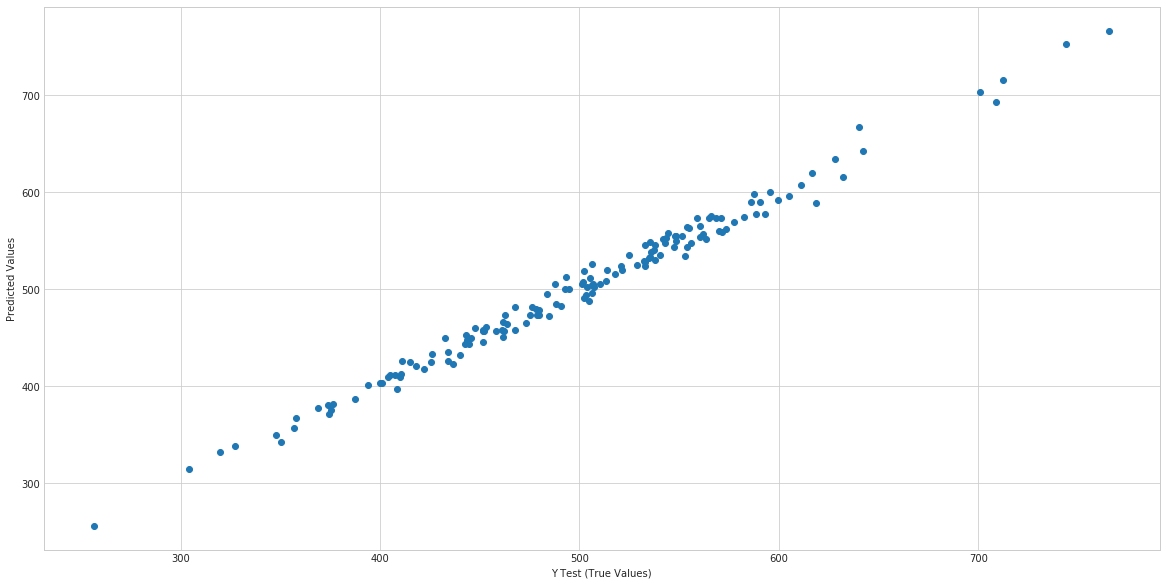

In [63]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,predictions);
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values');

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score $R^2$.

** Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [67]:
print('MAE:   ',metrics.mean_absolute_error(y_test,predictions))
print('MSE:   ',metrics.mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
print('\n')
print('R^2:   ',metrics.explained_variance_score(y_test,predictions))

MAE:    7.228148653430845
MSE:    79.81305165097471
RMSE:   2.6885216483098744


R^2:    0.9890771231889606


## Residuals

**Our model demonstrated a pretty good linear fit. Exploring the residuals will help to make sure everything was okay with our data. **


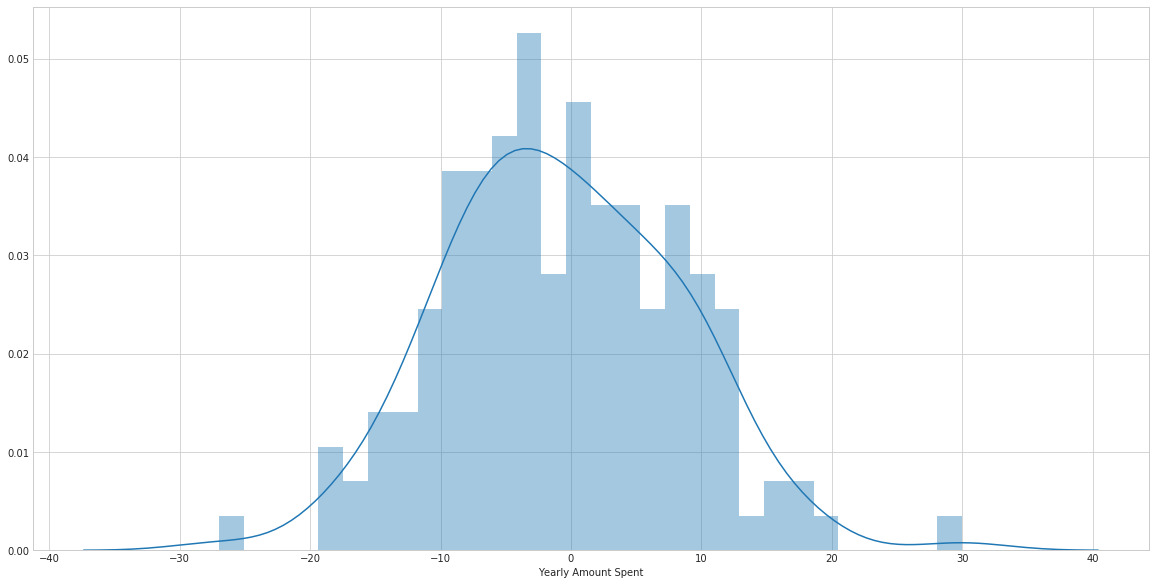

In [58]:
plt.figure(figsize=(20,10))
sns.distplot((y_test-predictions),bins =30);

## Conclusion
We still want to figure out the answer to the original question, do we tell the client to focus their efforts on mobile app or website development? Or, maybe that doesn't even really matter.


In [59]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Interpreting the coefficients, breaking it down. **

** Avg. Session Length**: If we hold all other values still, a single unit increase in Avg. Session Length is associated with an increse of almost $26.

** Time on App**: Again, If we hold all other values still, a single unit increase in Time on App is associated with an increse of $38.

** Length of Membership**: Last, but not least. If we hold all other values still, a single unit increase in Length of Membership is assosciated with an increse of $61.

**As a hypothetical consultant**, The anwer seems a tricky, my initial advice to the client would be to target their efforts on catering to their most loyal members, because *Length of Membership* is the coefficient with the highest values, bringing in $61 for every unit that increases.

** However, and trickier still, but more in line with the job requested**, 
I could suggest more effort be focused on app development as that is the area with with the higher coefficient. More effort could translate into an even higher return. Or, I could suggest that more effort be focused on the web site, there is an unusually low coefficient *Time on Website*. It may be worth the effort to develop the web site to potentially acheive higher returns.